# Step 1: Import libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Turn your project folder path into a string

path = r'/Users/peterreadman/Desktop/Python Projects/CareerFoundry/04-2020 Instacart Basket Analysis/'

In [3]:
# import orders_products_merged_busiest.pkl dataframe from the pkl file

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', '02b Prepared Data', 'orders_products_merged_busiest.pkl'))

# Step 2
*In this Exercise, you learned how to find the aggregated mean of the “order_number” column grouped by “department_id” for a subset of your dataframe. Now, repeat this process for the **entire** dataframe.*

In [4]:
# Use agg() and 'mean' to return the mean 'order_number'

ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

order_number
                      mean
department_id             
1                15.457838
2                17.277920
3                17.170395
4                17.811403
5                15.215751
6                16.439806
7                17.225802
8                15.340650
9                15.895474
10               20.197148
11               16.170638
12               15.887671
13               16.583536
14               16.773669
15               16.165037
16               17.665606
17               15.694469
18               19.310397
19               17.177343
20               16.473447
21               22.902379

# Step 3
*Analyze the result. How do the results for the entire dataframe differ from those of the subset? Include your comments in a markdown cell below the executed code*

**Answer**

The results for the entire data set include all department IDs 1–21 and the mean order number of the entire data frame are different to those returned in the subset.

The range of order_numbers is approximately 15.2 (for dept ID 5) to 22.9 (for dept ID 21)

# Step 4
*Follow the instructions in the Exercise for creating a loyalty flag for existing customers using the transform() and loc() functions*

In [5]:
# Create a 'max_order' column to store the maximum order numbers

ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [6]:
# Change max_rows display in pandas to 'none'

pd.options.display.max_rows = None

In [7]:
ords_prods_merge.head(5)

order_id  user_id  order_number  orders_day_of_the_week  order_hour_of_day  \
0   2539329        1             1                       2                  8   
1   2398795        1             2                       3                  7   
2    473747        1             3                       3                 12   
3   2254736        1             4                       4                  7   
4    431534        1             5                       4                 15   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                    NaN         196                  1          0   
1                   15.0         196                  1          1   
2                   21.0         196                  1          1   
3                   29.0         196                  1          1   
4                   28.0         196                  1          1   

   Unnamed: 0 product_name  aisle_id  department_id  prices _merge  \
0         195         Soda        77              7     9.0   both   
1         195         Soda        77              7     9.0   both   
2         195         Soda        77              7     9.0   both   
3         195         Soda        77              7     9.0   both   
4         195         Soda        77              7     9.0   both   

     price_range_loc     busiest_day     busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy   Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Least busy days        Average orders   
2  Mid-range product  Regularly busy  Least busy days           Most orders   
3  Mid-range product      Least busy  Least busy days        Average orders   
4  Mid-range product      Least busy  Least busy days           Most orders   

   max_order  
0         10  
1         10  
2         10  
3         10  
4         10

In [8]:
# Set the flags for loyalty
# set 'Loyal customer' as any customer with 'max_order' of more then 40

ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [9]:
# set 'Regular customer' as any customer with 'max_order' between 11 and 40

ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [10]:
# set 'New customer' as any customer with 'max_order' less than or equal to 10

ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [11]:
# Check the frequency 

ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

# Step 5
*The marketing team at Instacart wants to know whether there’s a difference between the spending habits of the three types of customers you identified. Use the loyalty flag you created and check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer). What you’re trying to determine is whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers*

In [12]:
# Calculate the mean price of orders per loyalty_flag
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.294670  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

**Observations**
Loyal customer's orders have mean price of 10.39 </br>
New customers orders have mean price of 13.29 </br>
Regular customers orders have mean price of 12.50 </br>
</br>
There is some variation in average (mean) price of orders between the three loyalty groups. **Loyal customers spend less per order** than both **Regular** and **New customers**.

# Step 6
*The team now wants to target different types of spenders in their marketing campaigns. This can be achieved by looking at the prices of the items people are buying. Create a spending flag for each user based on the average price across all their orders using the following criteria:*</br>
- If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”</br>
</br>
- If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”</br>

In [13]:
# Calculate mean product prices per user_id
ords_prods_merge.groupby('user_id')['prices'].mean()

user_id
1             6.367797
2             7.515897
3             8.197727
4             8.205556
5             9.189189
6             8.471429
7             7.466990
8             8.781633
9             7.607895
10            8.651049
11            8.328723
12            8.116216
13            8.708642
14            8.014286
15            3.980556
16            8.228571
17          108.648299
18            7.702564
19            8.372059
20            5.409091
21            7.012683
22            7.427536
23            8.222500
24            6.742105
25            8.257143
26            6.783929
27            7.659269
28            8.355249
29            7.437333
30            9.436364
31            8.137793
32            7.571930
33            6.622642
34            7.046875
35            7.906522
36            7.285621
37            8.036170
38            8.456477
39            7.141844
40            6.668269
41            8.061538
42            7.466165
43            7.444898
44 

In [14]:
# Split the data into groups based on the “user_id” column.

# Apply the transform() function on the “prices” column to generate the mean prices for each user.

# Create a new column, “mean_prices,” into which you’ll place the results of your aggregation.

ords_prods_merge['mean_prices'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [15]:
# Check the head to see the new column 'mean_prices'

ords_prods_merge.head(5)

order_id  user_id  order_number  orders_day_of_the_week  order_hour_of_day  \
0   2539329        1             1                       2                  8   
1   2398795        1             2                       3                  7   
2    473747        1             3                       3                 12   
3   2254736        1             4                       4                  7   
4    431534        1             5                       4                 15   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                    NaN         196                  1          0   
1                   15.0         196                  1          1   
2                   21.0         196                  1          1   
3                   29.0         196                  1          1   
4                   28.0         196                  1          1   

   Unnamed: 0  ... department_id  prices  _merge    price_range_loc  \
0         195  ...             7     9.0    both  Mid-range product   
1         195  ...             7     9.0    both  Mid-range product   
2         195  ...             7     9.0    both  Mid-range product   
3         195  ...             7     9.0    both  Mid-range product   
4         195  ...             7     9.0    both  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day max_order  \
0  Regularly busy   Regularly busy        Average orders        10   
1  Regularly busy  Least busy days        Average orders        10   
2  Regularly busy  Least busy days           Most orders        10   
3      Least busy  Least busy days        Average orders        10   
4      Least busy  Least busy days           Most orders        10   

   loyalty_flag  mean_prices  
0  New customer     6.367797  
1  New customer     6.367797  
2  New customer     6.367797  
3  New customer     6.367797  
4  New customer     6.367797  

[5 rows x 22 columns]

In [16]:
# If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”

ords_prods_merge.loc[ords_prods_merge['mean_prices'] < 10, 'spending_flag'] = 'Low spender'

In [17]:
# If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”

ords_prods_merge.loc[ords_prods_merge['mean_prices'] >= 10, 'spending_flag'] = 'High spender'

In [18]:
# Check the user_id, spending_flag and mean_prices columns

ords_prods_merge[['user_id', 'spending_flag', 'mean_prices']].head(60)

user_id spending_flag  mean_prices
0         1   Low spender     6.367797
1         1   Low spender     6.367797
2         1   Low spender     6.367797
3         1   Low spender     6.367797
4         1   Low spender     6.367797
5         1   Low spender     6.367797
6         1   Low spender     6.367797
7         1   Low spender     6.367797
8         1   Low spender     6.367797
9         1   Low spender     6.367797
10       15   Low spender     3.980556
11       15   Low spender     3.980556
12       15   Low spender     3.980556
13       15   Low spender     3.980556
14       15   Low spender     3.980556
15       19   Low spender     8.372059
16       19   Low spender     8.372059
17       19   Low spender     8.372059
18       21   Low spender     7.012683
19       31   Low spender     8.137793
20       31   Low spender     8.137793
21       43   Low spender     7.444898
22       43   Low spender     7.444898
23       52   Low spender     6.356287
24       52   Low spender     6.356287
25       52   Low spender     6.356287
26       52   Low spender     6.356287
27       52   Low spender     6.356287
28       52   Low spender     6.356287
29       52   Low spender     6.356287
30       52   Low spender     6.356287
31       52   Low spender     6.356287
32       52   Low spender     6.356287
33       52   Low spender     6.356287
34       52   Low spender     6.356287
35       52   Low spender     6.356287
36       52   Low spender     6.356287
37       67   Low spender     7.656790
38       67   Low spender     7.656790
39       67   Low spender     7.656790
40       67   Low spender     7.656790
41       67   Low spender     7.656790
42       67   Low spender     7.656790
43       67   Low spender     7.656790
44       67   Low spender     7.656790
45       67   Low spender     7.656790
46       67   Low spender     7.656790
47       67   Low spender     7.656790
48       67   Low spender     7.656790
49       67   Low spender     7.656790
50       67   Low spender     7.656790
51       67   Low spender     7.656790
52       67   Low spender     7.656790
53       67   Low spender     7.656790
54       67   Low spender     7.656790
55       67   Low spender     7.656790
56       81   Low spender     8.165385
57       81   Low spender     8.165385
58       82   Low spender     6.441221
59       82   Low spender     6.441221

# Step 7
*In order to send relevant notifications to users within the app (for instance, asking users if they want to buy the same item again), the Instacart team wants you to determine frequent versus non-frequent customers. Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column. The criteria for the flag should be as follows:* </br>
</br>
- If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
</br>
</br>
- If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
</br>
</br>
- If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”

In [19]:
# Split the data into groups based on the “user_id” column.

# Apply the transform() function on the “days_since_last_order” column to generate the median days since prior order for each user.

# Create a new column, “median_days,” into which you’ll place the results of your aggregation.

ords_prods_merge['median_days'] = ords_prods_merge.groupby(['user_id'])['days_since_last_order'].transform(np.median)

In [20]:
# Check the head to see the new column 'median_days'

ords_prods_merge.head(5)

order_id  user_id  order_number  orders_day_of_the_week  order_hour_of_day  \
0   2539329        1             1                       2                  8   
1   2398795        1             2                       3                  7   
2    473747        1             3                       3                 12   
3   2254736        1             4                       4                  7   
4    431534        1             5                       4                 15   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                    NaN         196                  1          0   
1                   15.0         196                  1          1   
2                   21.0         196                  1          1   
3                   29.0         196                  1          1   
4                   28.0         196                  1          1   

   Unnamed: 0  ... _merge    price_range_loc     busiest_day     busiest_days  \
0         195  ...   both  Mid-range product  Regularly busy   Regularly busy   
1         195  ...   both  Mid-range product  Regularly busy  Least busy days   
2         195  ...   both  Mid-range product  Regularly busy  Least busy days   
3         195  ...   both  Mid-range product      Least busy  Least busy days   
4         195  ...   both  Mid-range product      Least busy  Least busy days   

  busiest_period_of_day max_order  loyalty_flag mean_prices spending_flag  \
0        Average orders        10  New customer    6.367797   Low spender   
1        Average orders        10  New customer    6.367797   Low spender   
2           Most orders        10  New customer    6.367797   Low spender   
3        Average orders        10  New customer    6.367797   Low spender   
4           Most orders        10  New customer    6.367797   Low spender   

   median_days  
0         20.5  
1         20.5  
2         20.5  
3         20.5  
4         20.5  

[5 rows x 24 columns]

In [21]:
# If the median of “days_since_prior_order” is higher than 20,
# then the customer should be labeled a “Non-frequent customer.”

ords_prods_merge.loc[ords_prods_merge['median_days'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [22]:
# If the median is higher than 10 and lower than or equal to 20,
# then the customer should be labeled a “Regular customer.”

ords_prods_merge.loc[(ords_prods_merge['median_days'] > 10) & (ords_prods_merge['median_days'] <= 20), 'frequency_flag'] = 'Regular customer'

In [23]:
# If the median is lower than or equal to 10,
# then the customer should be labeled a “Frequent customer"

ords_prods_merge.loc[ords_prods_merge['median_days'] <= 10, 'frequency_flag'] = "Frequent customer"

In [24]:
# Check the user_id, frequency_flag and median_days columns

ords_prods_merge[['user_id', 'frequency_flag', 'median_days']].head(100)

user_id         frequency_flag  median_days
0         1  Non-frequent customer         20.5
1         1  Non-frequent customer         20.5
2         1  Non-frequent customer         20.5
3         1  Non-frequent customer         20.5
4         1  Non-frequent customer         20.5
5         1  Non-frequent customer         20.5
6         1  Non-frequent customer         20.5
7         1  Non-frequent customer         20.5
8         1  Non-frequent customer         20.5
9         1  Non-frequent customer         20.5
10       15      Frequent customer         10.0
11       15      Frequent customer         10.0
12       15      Frequent customer         10.0
13       15      Frequent customer         10.0
14       15      Frequent customer         10.0
15       19      Frequent customer          6.0
16       19      Frequent customer          6.0
17       19      Frequent customer          6.0
18       21      Frequent customer          7.5
19       31      Frequent customer          6.0
20       31      Frequent customer          6.0
21       43      Frequent customer         10.0
22       43      Frequent customer         10.0
23       52      Frequent customer          8.0
24       52      Frequent customer          8.0
25       52      Frequent customer          8.0
26       52      Frequent customer          8.0
27       52      Frequent customer          8.0
28       52      Frequent customer          8.0
29       52      Frequent customer          8.0
30       52      Frequent customer          8.0
31       52      Frequent customer          8.0
32       52      Frequent customer          8.0
33       52      Frequent customer          8.0
34       52      Frequent customer          8.0
35       52      Frequent customer          8.0
36       52      Frequent customer          8.0
37       67      Frequent customer          7.0
38       67      Frequent customer          7.0
39       67      Frequent customer          7.0
40       67      Frequent customer          7.0
41       67      Frequent customer          7.0
42       67      Frequent customer          7.0
43       67      Frequent customer          7.0
44       67      Frequent customer          7.0
45       67      Frequent customer          7.0
46       67      Frequent customer          7.0
47       67      Frequent customer          7.0
48       67      Frequent customer          7.0
49       67      Frequent customer          7.0
50       67      Frequent customer          7.0
51       67      Frequent customer          7.0
52       67      Frequent customer          7.0
53       67      Frequent customer          7.0
54       67      Frequent customer          7.0
55       67      Frequent customer          7.0
56       81  Non-frequent customer         30.0
57       81  Non-frequent customer         30.0
58       82       Regular customer         11.5
59       82       Regular customer         11.5
60       82       Regular customer         11.5
61       82       Regular customer         11.5
62       82       Regular customer         11.5
63       82       Regular customer         11.5
64       82       Regular customer         11.5
65       82       Regular customer         11.5
66       82       Regular customer         11.5
67       98  Non-frequent customer         25.0
68       98  Non-frequent customer         25.0
69       98  Non-frequent customer         25.0
70       98  Non-frequent customer         25.0
71       98  Non-frequent customer         25.0
72       98  Non-frequent customer         25.0
73       98  Non-frequent customer         25.0
74      109  Non-frequent customer         26.0
75      120       Regular customer         19.0
76      120       Regular customer         19.0
77      185  Non-frequent customer         25.0
78      195      Frequent customer          4.0
79      195      Frequent customer          4.0
80      195      Frequent customer          4.0
81      195      Frequent customer          4.0
82      195      Fre

# Step 8
*Ensure your notebook is clean and structured and that your code is well commented*
</br>
</br>
**Done**, hopefully

# Step 9
*Export your dataframe as a pickle file and store it correctly in your “Prepared Data” folder*

In [25]:
ords_prods_merge.to_pickle((os.path.join(path, '02 Data', '02b Prepared Data', 'orders_products_spend_freq_flags.pkl')))

# Cleaning 'prices' outliers from 4.9
- prices of 14,900 and 99,999 changed to NaN values

# Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

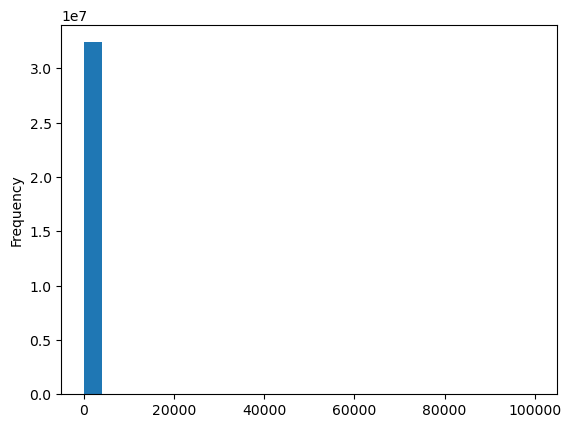

In [26]:
# Let’s try creating a histogram of the “prices” column.
# You can do so via the following code:

ords_prods_merge['prices'].plot.hist(bins = 25)

In [27]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

There's something odd with the maximum value

In [28]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [29]:
ords_prods_merge['prices'].median()

7.4

In [30]:
ords_prods_merge['prices'].max()

99999.0

Max is huge at $99,999. Use a scatterplot to see it

In [31]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

NameError: name 'sns' is not defined

What does this show?
- there's a bunch of values around the mean (12) expected
- theres something near 20,000
- and that max far out near 100,000

In [ ]:
# Carry out some more exploratory checks
# Locate prices higher than $100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

In [ ]:
# Show all columns by using set_option() method and setting 'None'

pd.set_option('display.max_columns', None)

In [ ]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

In [ ]:
# Mark these as NaNs for now, since they don't make sense in terms of other values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [ ]:
ords_prods_merge['prices'].max()